In [1]:
#import packages
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ryan\AppData\Local\Temp\ipykernel_28724\3557665146.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Import the data. Use a file path variable to create more flexible code.

#enter your personal file path here
file_path = r'C:\Users\Ryan\Documents\AlgorithmsI\HW2_train_data.zip'

#import the data set "HW2_train_data.zip" into an object called df
df = pd.read_csv(file_path, compression = 'zip', header = 0, sep = ',')

In [3]:
#Convert the data into a pandas DataFrame
df = pd.DataFrame(df)

In [4]:
#look at the dataframe to make sure it looks correct
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x23,x24,x25,x26,x27,x28,x29,x30,yc,y
0,2.668047,2.512075,3.060572,2.233789,4.478572,6.530963,6.787785,7.563378,7.503967,9.734594,...,3.354813,7.796450,1.566662,2.674742,2.921870,4.131281,2.508337,7.089467,12.226698,1
1,1.737348,1.781937,3.354183,3.320585,5.216814,6.224762,4.796982,8.975342,8.910695,8.915704,...,4.763792,6.335497,5.503772,3.445129,7.857982,3.868056,6.613743,5.352252,40.107414,1
2,0.798462,1.279138,4.393210,3.972133,7.958679,5.025876,6.871565,8.525197,9.205740,9.313079,...,5.848071,3.162566,5.233808,3.646774,7.511821,5.121586,1.026094,4.315542,17.064779,1
3,0.849088,2.505535,2.634278,3.703189,4.897735,7.101429,7.229454,7.079203,8.464205,10.895952,...,6.220861,2.313534,7.375036,6.041267,4.159251,7.794485,2.805441,12.253303,65.004235,0
4,1.916052,3.162870,4.465832,3.567905,5.558714,5.967698,7.946285,8.449089,7.471565,9.634711,...,3.569756,7.027035,5.410837,5.217609,5.392645,9.533404,3.595141,8.359549,-15.082111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79984,1.087323,1.078183,3.275498,6.531712,5.031993,5.913282,7.131194,8.172402,8.328950,8.956194,...,8.566414,1.783669,5.279951,8.071606,5.069207,5.957447,4.586274,11.245259,29.083010,1
79985,-1.201451,3.652690,1.796487,3.391880,6.849606,5.097193,8.150054,6.589168,9.961639,11.222683,...,3.407272,2.878138,9.486376,5.716695,1.845495,4.372873,5.349758,7.640543,40.653180,1
79986,0.586397,2.681999,2.669768,3.950114,4.756875,6.034655,6.212670,8.128066,11.462293,10.327366,...,6.933657,4.382456,7.191854,5.182857,6.514469,3.653785,6.195588,7.114796,11.248709,0
79987,-0.314788,2.277095,1.506443,4.028695,5.800061,5.840937,6.552733,8.971052,10.939602,10.736952,...,3.281091,5.179839,3.951445,7.385509,7.395976,6.716505,2.815929,3.493417,-18.362859,1


In [5]:
#we are only using predictors x1 - x15 and only going to focus on 'y'... we get get rid of the unneeded data (x16 - x30, yc)

#NOTE: PYTHON INDEXING STARTS AT 0!

#calling our new dataframe "data"; the iloc function is used to index data frames based on integer-location and not column/row names
#iloc[rows, columns] --> which rows and columns you want to select from the data frame. NOTE: can enter integer, slice object, list, boolean array

#Here iloc is telling Python to select all rows, and columns 1 - 16 (inlcues the index column) and column 31 


data = df.iloc[:, list(range(0,15)) + [31]]
data


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,2.668047,2.512075,3.060572,2.233789,4.478572,6.530963,6.787785,7.563378,7.503967,9.734594,-2.480993,-0.408699,4.742410,7.351961,4.688353,1
1,1.737348,1.781937,3.354183,3.320585,5.216814,6.224762,4.796982,8.975342,8.910695,8.915704,0.685662,-7.607162,-5.627045,-11.810894,10.826150,1
2,0.798462,1.279138,4.393210,3.972133,7.958679,5.025876,6.871565,8.525197,9.205740,9.313079,3.190106,2.808168,1.689499,-9.806354,0.738910,1
3,0.849088,2.505535,2.634278,3.703189,4.897735,7.101429,7.229454,7.079203,8.464205,10.895952,-0.532611,-9.085995,-8.012755,3.586923,-10.356531,0
4,1.916052,3.162870,4.465832,3.567905,5.558714,5.967698,7.946285,8.449089,7.471565,9.634711,-1.479630,9.661014,11.680522,-3.709750,-14.998197,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79984,1.087323,1.078183,3.275498,6.531712,5.031993,5.913282,7.131194,8.172402,8.328950,8.956194,5.718705,0.110426,12.351250,-13.793765,-5.330479,1
79985,-1.201451,3.652690,1.796487,3.391880,6.849606,5.097193,8.150054,6.589168,9.961639,11.222683,4.756465,-3.570937,0.043987,-1.607291,4.541348,1
79986,0.586397,2.681999,2.669768,3.950114,4.756875,6.034655,6.212670,8.128066,11.462293,10.327366,0.593579,1.189988,-3.479375,-12.804137,10.307051,0
79987,-0.314788,2.277095,1.506443,4.028695,5.800061,5.840937,6.552733,8.971052,10.939602,10.736952,8.637683,8.845357,1.556648,-1.804859,1.313721,1


In [6]:
#double check to make sure all the columns we want are there. Looks good!
print(data.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'y'],
      dtype='object')


In [7]:
#Check the data for missing values
data_missing_values = data.isna()

data_missing_values_sums = data.isna().sum()
print(data_missing_values_sums)

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
y      0
dtype: int64


There is no missing data in the dateframe. This is very convienent becuase there is no perfect way to impute missing data.

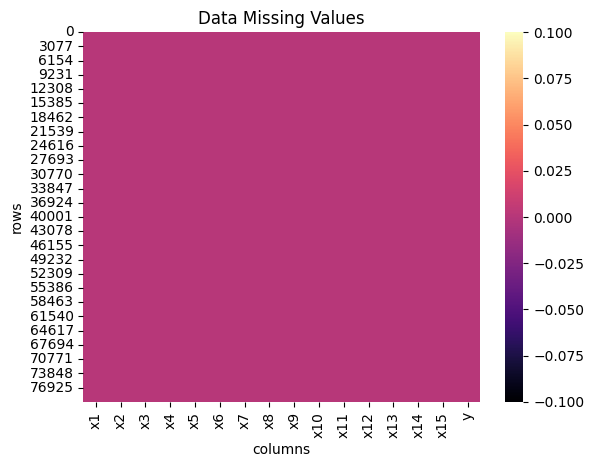

In [8]:
#heatmap
#Investigate the Training Data for missing values just to make sure. Also is a useful visual function for all sorts of data investigation.

#cmap arguement can change the color scale, cbar arguement places the color bar to the right of the graph
plt.figure
sns.heatmap(data_missing_values, cmap = 'magma', cbar = True)
plt.title('Data Missing Values')
plt.xlabel('columns')
plt.ylabel('rows')
plt.show()


In [9]:
#sklearn is a great data analysis package. It has a lot of very useful, built in functions such as: train_test_split function that also allows us to set
#the seed for reproducibility.

#this function requires us to split our dataframe into predictors and observations

#making a new dataframe called X that is dropping 'y' column from 'data'
X = data.drop('y', axis = 1)
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,2.668047,2.512075,3.060572,2.233789,4.478572,6.530963,6.787785,7.563378,7.503967,9.734594,-2.480993,-0.408699,4.742410,7.351961,4.688353
1,1.737348,1.781937,3.354183,3.320585,5.216814,6.224762,4.796982,8.975342,8.910695,8.915704,0.685662,-7.607162,-5.627045,-11.810894,10.826150
2,0.798462,1.279138,4.393210,3.972133,7.958679,5.025876,6.871565,8.525197,9.205740,9.313079,3.190106,2.808168,1.689499,-9.806354,0.738910
3,0.849088,2.505535,2.634278,3.703189,4.897735,7.101429,7.229454,7.079203,8.464205,10.895952,-0.532611,-9.085995,-8.012755,3.586923,-10.356531
4,1.916052,3.162870,4.465832,3.567905,5.558714,5.967698,7.946285,8.449089,7.471565,9.634711,-1.479630,9.661014,11.680522,-3.709750,-14.998197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79984,1.087323,1.078183,3.275498,6.531712,5.031993,5.913282,7.131194,8.172402,8.328950,8.956194,5.718705,0.110426,12.351250,-13.793765,-5.330479
79985,-1.201451,3.652690,1.796487,3.391880,6.849606,5.097193,8.150054,6.589168,9.961639,11.222683,4.756465,-3.570937,0.043987,-1.607291,4.541348
79986,0.586397,2.681999,2.669768,3.950114,4.756875,6.034655,6.212670,8.128066,11.462293,10.327366,0.593579,1.189988,-3.479375,-12.804137,10.307051
79987,-0.314788,2.277095,1.506443,4.028695,5.800061,5.840937,6.552733,8.971052,10.939602,10.736952,8.637683,8.845357,1.556648,-1.804859,1.313721


In [10]:
#only want the y-values so we are indexing column 'y' out of data and placing it in an object called y
y = data['y']
y

0        1
1        1
2        1
3        0
4        1
        ..
79984    1
79985    1
79986    0
79987    1
79988    1
Name: y, Length: 79989, dtype: int64

In [11]:
#use the sklearn function to split data into 80% training and 20% test

#we have to name our new dataframes in the order listed below. test_size tells Python what percent of the data is going to the test set, and 
#random_state sets the random seed number for reproducibility

#splitting the data into .8 train and .2 test, and the random state is the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

#The previous function turned our dataframes into arrays. We need to go back to dataframes so we do that here.

X_train = X_train.apply(pd.to_numeric, errors = 'coerce')

In [12]:
y_test

3454     1
38500    0
11881    1
45532    1
37091    1
        ..
57818    1
74056    1
36186    0
68285    1
16851    0
Name: y, Length: 15998, dtype: int64

In [13]:
#We know there is no missing values, so this step is unnessesary, but we will check anyways becuase it is good practice.
train_missing_values = X_train.isna()

train_missing_values_sums = X_train.isna().sum()
print(train_missing_values_sums)


x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64


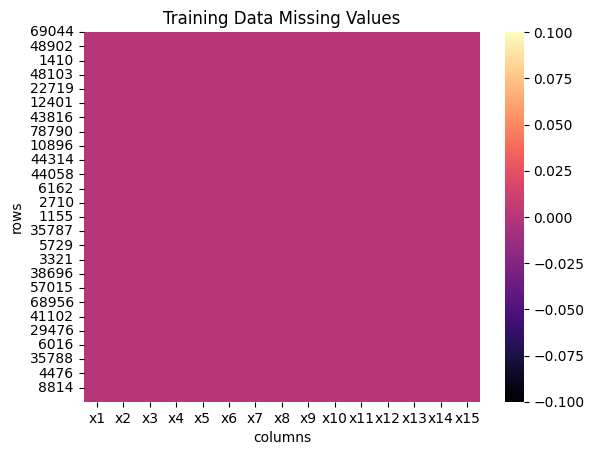

In [14]:
#Investigate the Training Data for missing values (again not necessary becuase we already know there is no missing values... but always good to check)

plt.figure
sns.heatmap(train_missing_values, cmap = 'magma', cbar = True)
plt.title('Training Data Missing Values')
plt.xlabel('columns')
plt.ylabel('rows')
plt.show()



In [ ]:
# Customize the pairplot: pairplots are super useful. They show the distrubtion of each variable and its association with every other variable independently
sns.pairplot(X_train)


We can see from the paoirplot that predictors x1 to x10 are normally distributed. However, x11 to x15 are not, they look uniform. This is going to be a problem with LDA and QDA becuase they assume a normal distribution for each class (LDA also assumes same covariance). We will standardize the data so each predictor is normally distributed with a mean of 0 and standard deviation of 1. 

In [ ]:
X_train.describe()

As we can see from the describe function. The normally distribted predictors are not necessarily centered at 0, and not all the standard deviations are perfectly 1. We will perform a standardization for all the predictors for this reason.

In [ ]:
#standardize the predictor variables to follow a normal distribution. As we can see from the pairplot, x1 through x10 look normally distruibted. x11 
#through x15 is not normally distrubted. 

#As we can see from the describe function above... even those distribtions that appear normal are not perfect. Most of the standard deviations are close
#enough to 1, but not all the means are centered at zero.

#Here we are going to standardize all the data in the training set and then use that standardization equation to standardize the test set based on the 
#training data

#Use sklearn StandardSclaer Function

scaler = StandardScaler()
#fit the scalar to the train data (calculates mean and std. dev for each predictor)
scaler.fit(X_train)

#Standardize the train data
X_train_scaled = scaler.transform(X_train)

#Standardize the test data on the basis of the train data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SKlearn StandardScaler turned the dataframe into a numpy array for calulations... here we want to convert back to dataframe format
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

#do the same for the test set
X_test_scaled = pd.DataFrame(X_test_scaled, columns =X_test.columns)


In [ ]:
#When we describe the train data we now see that all the predictors are centered at a mean = 0, and a standard deviation of 1
#NOTE: it is not a perfect standardization. The scaler is based on the training data, so we expect imperfections
X_train_scaled.describe()

In [ ]:
#Implement Logistic Regression 

#Create an Instance ... sklearn models need instances. Essentially it is a Python class that initializes an object and will use the default parameters
#for that model/instance unless otherwise specified

logistic_regression_model = LogisticRegression()

#Now we fit the model to the training data
logistic_regression_model.fit(X_train_scaled, y_train)

#Apply the model to the test set and predict the y's/outcome
y_test_predictions_logistic = logistic_regression_model.predict(X_test_scaled)
y_test_prob_logistic = logistic_regression_model.predict_proba(X_test_scaled)[:,1]

#Get probabilities for the training set
y_train_prob_logistic = logistic_regression_model.predict_proba(X_train_scaled)[:,1]

In [ ]:
#Find ROC curve and the AUC

#fpr = false positive rate; tpr = true positive rate

#sklearn's built in ROC/AUC function - test data
logistic_fpr, logistic_tpr, thresholds = roc_curve(y_test, y_test_prob_logistic)
logistic_auc = auc(logistic_fpr, logistic_tpr)

#ROC/AUC - train data
log_train_fpr, log_train_tpr, _ = roc_curve(y_train, y_train_prob_logistic)
log_train_auc = auc(log_train_fpr, log_train_tpr)

In [ ]:
#Print the AUC for LR - test
print(logistic_auc)

In [ ]:
#print the AUC for LR -training
print(log_train_auc)

In [ ]:
#plot the ROC Curve for LR- train

plt.plot(log_train_fpr, log_train_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Model - train')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [ ]:
#plot the ROC Curve for LR- test

plt.plot(logistic_fpr, logistic_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Model - test')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Model 2 - LDA

In [ ]:
#we are going to follow a similar framework as the logistic model using sklearn

#Create and instance
lda_model = LinearDiscriminantAnalysis()

In [ ]:
#Fit the model on our training data
lda_model.fit(X_train_scaled, y_train)

#Apply the fit to the testing set getting predictions and probabilities as before...
y_test_predictions_lda = lda_model.predict(X_test_scaled)
y_test_prob_lda = lda_model.predict_proba(X_test_scaled)[:,1]

#get train data probabilities
y_train_prob_lda = lda_model.predict_proba(X_train_scaled)[:,1]

#Compute ROC and AUC - test data
lda_fpr, lda_tpr, thresholds = roc_curve(y_test, y_test_prob_lda)
lda_auc = auc(lda_fpr, lda_tpr)

#ROC/AUC - train data
lda_train_fpr, lda_train_tpr, _ = roc_curve(y_train, y_train_prob_lda)
lda_train_auc = auc(lda_train_fpr, lda_train_tpr)

In [ ]:
#print the AUC for LDA model - test data
print(lda_auc)

In [ ]:
#print the AUC for the LDA model - train data
print(lda_train_auc)

In [ ]:
#plot the ROC curve for the LDA Model- train data

plt.plot(lda_train_fpr, lda_train_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model - train data')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [ ]:
#plot the ROC curve for the LDA Model - test data

plt.plot(lda_fpr, lda_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model - test data')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Model 3 - QDA

In [ ]:
#Taking the same approach with sklearn

#create an instance
qda_model = QuadraticDiscriminantAnalysis()

#Fit the model on the training data
qda_model.fit(X_train_scaled, y_train)

#Apply the fit to the testing set getting predictions and probabilities as before...
y_test_predictions_qda = qda_model.predict(X_test_scaled)
y_test_prob_qda = qda_model.predict_proba(X_test_scaled)[:,1]

#Get Probabiolities for train data
y_train_prob_qda = qda_model.predict_proba(X_train_scaled)[:,1]

#Compute ROC and AUC - test data
qda_fpr, qda_tpr, thresholds = roc_curve(y_test, y_test_prob_qda)
qda_auc = auc(qda_fpr, qda_tpr)

#compute ROC and AUC - train data
qda_train_fpr, qda_train_tpr, _ = roc_curve(y_train, y_train_prob_qda)
qda_auc_train = auc(qda_train_fpr, qda_train_tpr)




In [ ]:
#print the AUC for the QDA Model - test
print(qda_auc)

In [ ]:
#Print the AUC for the QDA model - train
print(qda_auc_train)

In [ ]:
#plot the ROC Curve for the QDA Model train data

plt.plot(qda_train_fpr, qda_train_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for QDA Model - Train Data')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [ ]:
#plot the ROC Curve for the QDA Model test data

plt.plot(qda_fpr, qda_tpr, color = 'red', label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for QDA Model - Test Data')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Findings. 

The AUC values for the training models are as follows:
1. Logistic: 0.8159939792000541
2. LDA: 0.8159257984959284
3. QDA: 0.8157437227502995

The AUC values for the test models are as follows:
1. Logistic: 0.8127743426307126
2. LDA: 0.8126459723784571
3. QDA: 0.8118709282691282



I am a little suprised that the AUC seemed to get worse as the moels progressed. I would expect a better AUC for the QDA model, as it is a more flexible model. However, they are all essentially equivalent here. I notices that the AUC got worse from trianing to the test models. This was expected becuase the training models should not be worse than the test ones.. because the machine learned on the train data we expect it to fit the model better.

However, the data seems to hold a pretty stable relationship between the test and the train data which is a good sign. This eases my overfitting convern. Overfitting would have drastically larger (and almost perfect AUCs) for the training, and a steep drop of in the test data.

I would go with logistic here becuase it has the best AUC for training, really similar for testing, and is not as flexible as QDA, but they are all so similar.